# TP 2 : Régression par minimisation avec 2 variables

## Problème 1
On considère les points $(1,3)$, $(3,3)$ et $(5,4)$

On cherche l'ordonnée à l'origine $b$ et le coefficient directeur $w$ de la droite d'équation $$y=wx+b$$ minimisant la somme des carrés des distances verticales entre les points et la droite (comme représenté ci-dessous) :
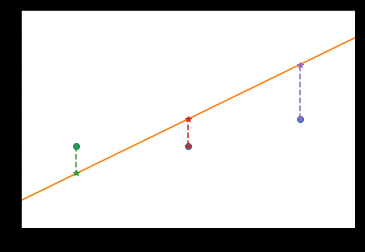

**Exercice 1.** Modéliser le programme d'optimisation à résoudre.

## Exploration graphique

In [1]:
# Chargement des librairies Python

# Mathématiques 
import numpy as np

# Graphique
from matplotlib import pyplot as plt

### Définition des points

La liste des points $(1,3)$, $(3,3)$ et $(5,4)$ se définit par la liste des abscisses et la liste des ordonnées.

In [2]:
X=[1,3,5]
Y=[3,3,4]

### Visualisation des points

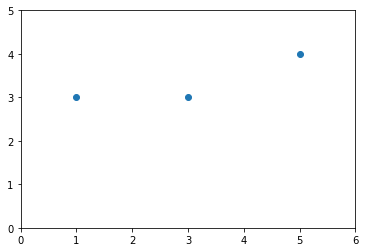

In [3]:
plt.axis([0,6,0,5]) # xmin,xmax,ymin,ymax
plt.plot(X,Y,'o') # représentation graphique des points

### Visualisation d'une droite de régression (pas forcément optimale)

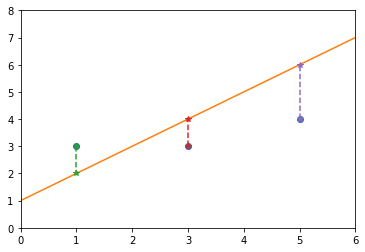

In [4]:
w=1
b=1
plt.axis([0,6,0,8])
plt.plot(X,Y,'o')
plt.plot([0,6],[b+w*0,b+w*6])
for i in range(len(X)):
    plt.plot([X[i],X[i]],[Y[i],b+w*X[i]],'*--')

***Exercice 2***
    
- Programmer un calcul qui, étant donnée $b$ et $w$, affiche les trois carrés des distance verticales entre la droite d'équation $y=b+wx$ et les points définis ci-dessus, ainsi que la somme de ces distances (pour affichier une valeur, utiliser : `print(...)')
- Utiliser cette fonction pour déterminer, à $0.1$ près, les valeurs de $b$ et $w$ optimales.
- Représenter la droite ainsi dessinée.



## Représentation graphique de la fonction à minimiser

### Définition de la fonction

In [5]:
def f(b,w):
    return np.sum([(b+w*X[i]-Y[i])**2 for i in range(len(X))])

**Exercice 3.**

Quel est le résultat de la commande : `[(b+w*X[i]-Y[i])**2 for i in range(len(X))]` ?

### Création d'un tableau de valeurs pour $f$

In [6]:
wlist=np.linspace(-5,5,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
blist=np.linspace(-5,5,50) # crée une liste de 50 nombres régulièrement espacés entre -5 et 5
flist=[[f(b,w) for w in wlist] for b in blist] # Tableau de valeur à 2 dimensions

### Représentation graphique de la fonction

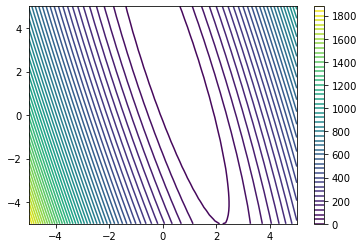

In [7]:
plt.axis([-5,5,-5,5])
plt.contour(blist,wlist,flist,50) # crée 50 courbes de niveau de la fonction f
plt.colorbar() # affiche une légende avec les niveaux

**Exercice 4.**
Peut-on lire, sur le graphique la solution $(b,w)$ optimale calculée dans l'exercice 1 ?

## Problème 2

On se donne un paquet de 20 points (générés aléatoirement), et on va déterminer la droite $y=b+wx$ minimisant la somme des carrés des distances verticales entre les points et la droite

### Génération aléatoire des points

In [8]:
# Génère uniformément 20 nombres entre 0 et 10
X=np.random.uniform(0, 10, 20)
# Génère 20 nombres y autour de la droite y=2x+3
# la fonction np.random.random_sample() renvoie un nombre aléatoire entre 0 et 1
Y=[2*X[i]+3+np.random.random_sample()*5 for i in range(len(X))]
print('X=',X)
print('Y=',Y)

X= [1.92200292 6.42671542 9.52772589 4.15888863 9.6322445  1.38558605
 4.44360909 7.911108   4.2240074  3.90773922 3.03565781 4.14800856
 1.17013251 4.34719142 6.27493507 2.81494514 7.72495768 5.78355312
 4.25235516 1.86469988]
Y= [8.718212128146334, 20.414571704776854, 24.20704350371332, 13.742659427431676, 25.92634004600543, 7.680587472668291, 14.152783007794218, 21.934679296440308, 14.855191551079342, 10.948170173075429, 9.89296932970235, 11.351253032499248, 8.40979332930996, 16.40606497252549, 18.830579516724928, 8.95621105406411, 19.678099994393534, 16.18105005040716, 11.910194457949206, 11.44452528492823]


### Nuage des points

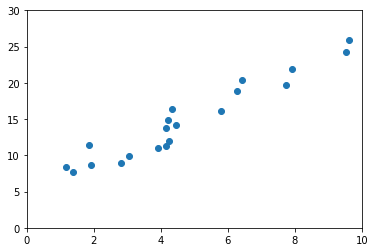

In [9]:
plt.axis([0,10,0,30])
plt.plot(X,Y,'o')

**Exercice 5.**

Utiliser Python pour résoudre graphiquement le problème :
- Programmer la fonction à minimiser
- La représenter graphiquement
- Déterminer une valeur approximative de son minimum
- Tracer le nuage de point ainsi que la droite de régression trouvée

**Exercice 6.**

On considère les observations :

 $X_1=\begin{pmatrix}1&1\end{pmatrix}\mapsto Y_1=1$
 $X_2=\begin{pmatrix}1&0\end{pmatrix}\mapsto Y_2=0$
 $X_3=\begin{pmatrix}0&1\end{pmatrix}\mapsto Y_3=0$ et 
 $X_4=\begin{pmatrix}0&0\end{pmatrix}\mapsto Y_4=0$.

On suppose que $\Pr(Y=1|X)=\sigma(b+W\cdot X)$ où $\sigma(x)=\frac{1}{1+e^{-x}}$ est la fonction sigmoïde. 

On cherche $(b^*,w_1^*,w_2^*)$ maximisant la log-vraisemblance :
$$\ln(L(b,W))=\sum\limits_{j=1}^{j=4} Y_j\ln(\sigma(b+W\cdot X_j))+(1-Y_j)\ln(1-\sigma(b+W\cdot X_j)).$$

Avec 3 variables à déterminer, il n'est pas possible de représenter graphiquement la fonction à optimiser.

On rappelle que le gradient d'une fonction $f$ en un point $(b,W)$ indique la direction croissante de $f$.

Programmer le calcul de $\ln(L(b,W))$ ainsi que le calcul de $[\text{grad} f](b,W)$, et utiliser ces fonctions afin de déterminer la valeur de $(b,W)$ à $0.1$ près maximisant la log-vraisemblance.